<a href="https://colab.research.google.com/github/y-ali0/Pendulum/blob/main/Exercise_1_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Core Task 1**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [ ]:
def derivatives(t, y, q, F):
  #The equation is for y[0] = theta, y[1] = omega = d(theta)/dt
  #d^2 theta/dt^2 = -sin(theta) - q*d(theta)/dt + Fsin(2/3*t)

  return[y[1],-np.sin(y[0])-q*y[1]+F*np.sin(2/3*t)]

In [ ]:
solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,20000*2*np.pi),y0=(0.01,0),args=(0.0,0.0,),t_eval=np.linspace(0,100*2*np.pi,1000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

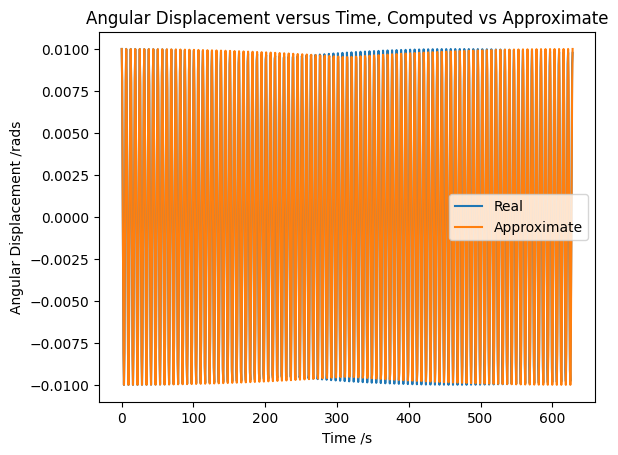

In [ ]:
plt.plot(x,y)
plt.plot(x,0.01*np.cos(x))
plt.xlabel("Time /s")
plt.ylabel("Angular Displacement /rads")
plt.legend(['Real', 'Approximate'])
plt.title("Angular Displacement versus Time, Computed vs Approximate")
plt.show()

#The approximation and the real solutions almost agree perfectly, but slight discrepancies are expected due to the period
#of the real pendulum being greater than the small angle approx thus a phase difference accumulates

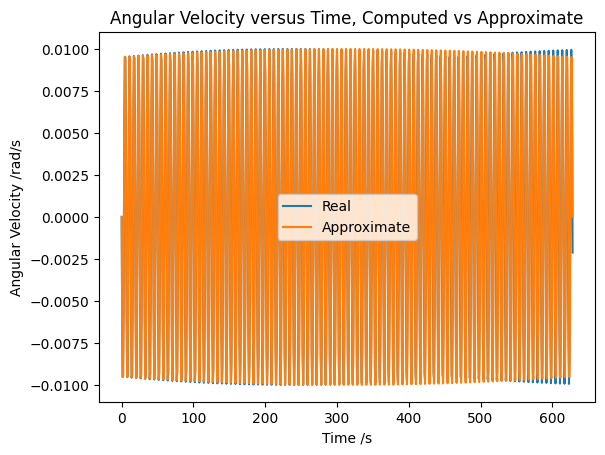

In [ ]:
plt.plot(x,dydx)
plt.plot(x,-0.01*np.sin(x))
plt.legend(['Real', 'Approximate'])
plt.xlabel("Time /s")
plt.ylabel("Angular Velocity /rad/s")
plt.title("Angular Velocity versus Time, Computed vs Approximate")
plt.show()

#The approximation and the real solutions almost agree perfectly, but slight discrepancies are expected due to the period
#of the real pendulum being greater than the small angle approx thus a phase difference accumulates

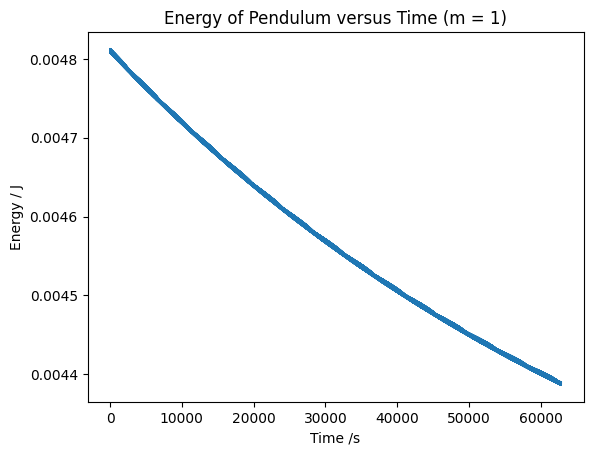

In [ ]:
solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,20000*2*np.pi),y0=(0.01,0),args=(0.0,0.0,),t_eval=np.linspace(0,10000*2*np.pi,40000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]
plt.plot(x,0.5*scipy.constants.g**2*dydx**2 + scipy.constants.g**2*(1-np.cos(y)))
plt.xlabel("Time /s")
plt.ylabel("Energy / J")
plt.title("Energy of Pendulum versus Time (m = 1)")
plt.show()

#Slow exponential decay which looks linear

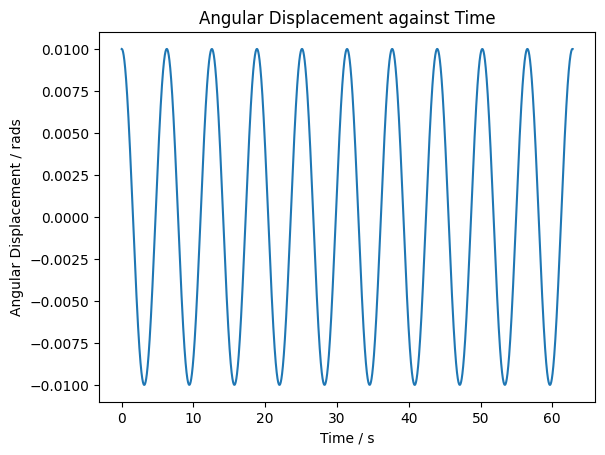

6.282186279716718


In [ ]:
solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,20*2*np.pi),y0=(0.01,0),args=(0.0,0.0,),t_eval=np.linspace(0,10*2*np.pi,1000000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(x,y)
plt.xlabel("Time / s")
plt.ylabel("Angular Displacement / rads")
plt.title("Angular Displacement against Time")
plt.show()

tolerance = 1e-6
index = np.where(np.abs(y) < tolerance)[0]
T = 4*x[index[0]]

print(T)

#Testing out method to find the period

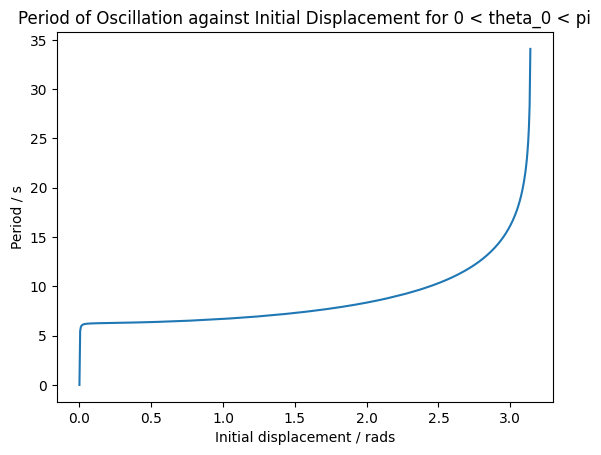

In [ ]:
theta = 0
theta_0 = []
T_values = []

while theta <= np.pi:
    solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,5*2*np.pi),y0=(theta,0),args=(0.0,0.0,),t_eval=np.linspace(0,5*2*np.pi,100000),)
    x, y, dydx = solution.t, solution.y[0], solution.y[1]
    tolerance = 1e-3

    index = np.where(np.abs(y) < tolerance)[0]

    T = 4 * x[index[0]]
    theta_0.append(theta)
    T_values.append(T)


    theta += 0.005

plt.plot(theta_0, T_values)
plt.xlabel('Initial displacement / rads')
plt.ylabel('Period / s')
plt.title('Period of Oscillation against Initial Displacement for 0 < theta_0 < pi')
plt.show()


In [ ]:
# Find the value closest to np.pi / 2 in theta_0 list
closest_theta = min(theta_0, key=lambda x: abs(x - np.pi / 2))

# Find the corresponding index
closest_index = theta_0.index(closest_theta)

# Retrieve the period corresponding to the closest theta value
T_at_closest_theta = T_values[closest_index]

print(f"The period T when theta_0 is closest to pi/2 is: {T_at_closest_theta} seconds")

The period T when theta_0 is closest to pi/2 is: 7.411719505544095 seconds


**Conclusions**

In the Core Task 1, I have successfully solved the differential equations using SciPy and plotted them to investigate a range of phenomena.

Firstly, I checked that the solutions were correct using the small angle approximation theoretical results and overlaying it ontop of my calculated plots, the fact that they overlap shows they agree.

Secondly, I plotted the evolution of energy with time for 10,000 natural oscillations with mass assumed to be 1.

Finally, I plotted how the period T of the pendulum varied with the initial displacement. My plots found that the period when the initial displacement is pi / 2 is T = 7.411719505544095 seconds

**Core Task 2**

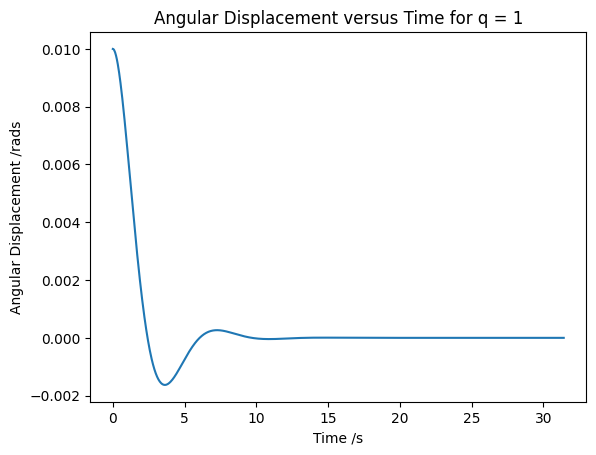

In [ ]:
solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,20*2*np.pi),y0=(0.01,0),args=(1,0.0,),t_eval=np.linspace(0,5*2*np.pi,1000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(x,y)
plt.xlabel("Time /s")
plt.ylabel("Angular Displacement /rads")
plt.title("Angular Displacement versus Time for q = 1")
plt.show()

# This is the lightly damped case

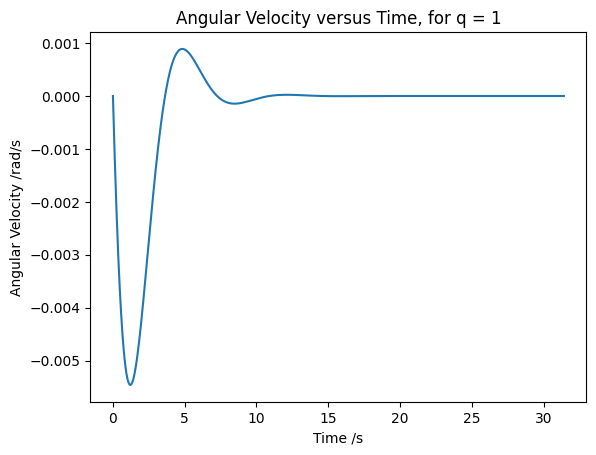

In [ ]:
plt.plot(x,dydx)
plt.xlabel("Time /s")
plt.ylabel("Angular Velocity /rad/s")
plt.title("Angular Velocity versus Time, for q = 1")
plt.show()

# This is the lightly-damped case

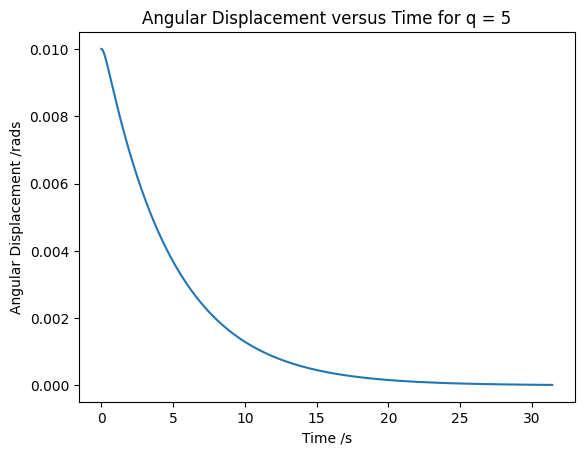

In [ ]:
solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,20*2*np.pi),y0=(0.01,0),args=(5,0.0,),t_eval=np.linspace(0,5*2*np.pi,1000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(x,y)
plt.xlabel("Time /s")
plt.ylabel("Angular Displacement /rads")
plt.title("Angular Displacement versus Time for q = 5")
plt.show()

# This is the overdamped case

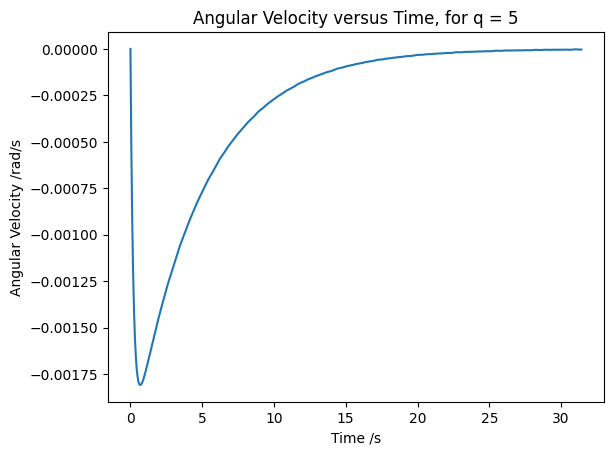

In [ ]:
plt.plot(x,dydx)
plt.xlabel("Time /s")
plt.ylabel("Angular Velocity /rad/s")
plt.title("Angular Velocity versus Time, for q = 5")
plt.show()

# This is the overdamped case

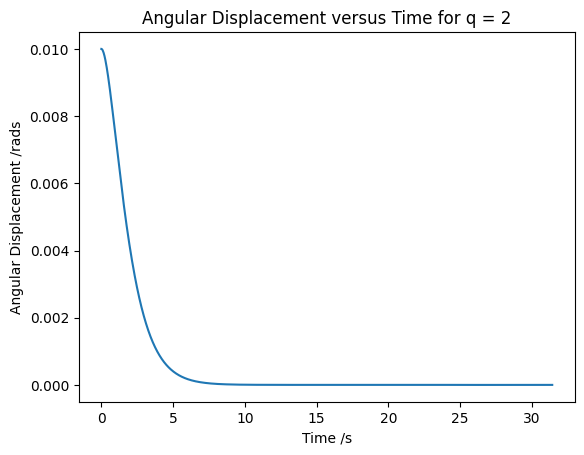

In [ ]:
solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,20*2*np.pi),y0=(0.01,0),args=(2,0.0,),t_eval=np.linspace(0,5*2*np.pi,1000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(x,y)
plt.xlabel("Time /s")
plt.ylabel("Angular Displacement /rads")
plt.title("Angular Displacement versus Time for q = 2")
plt.show()

# This is the critically damped case

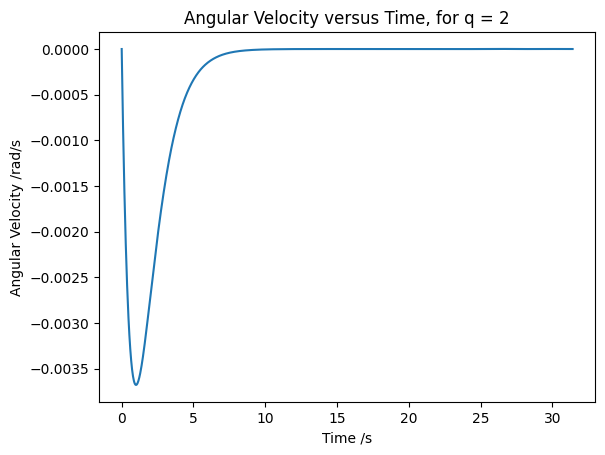

In [ ]:
plt.plot(x,dydx)
plt.xlabel("Time /s")
plt.ylabel("Angular Velocity /rad/s")
plt.title("Angular Velocity versus Time, for q = 2")
plt.show()

# This is the critically-damped case

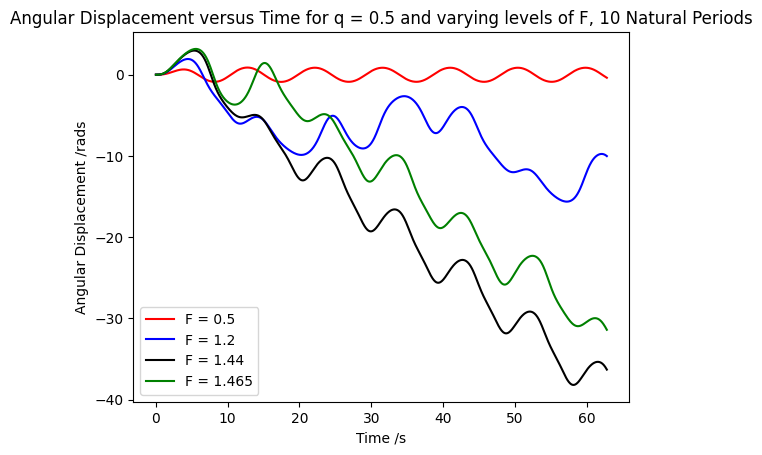

In [ ]:
solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.01,0),args=(0.5,0.5,),t_eval=np.linspace(0,10*2*np.pi,1000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(x,y,'r-',label = 'F = 0.5')
plt.xlabel("Time /s")
plt.ylabel("Angular Displacement /rads")
plt.title("Angular Displacement versus Time for q = 0.5 and varying levels of F, 10 Natural Periods")

solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.01,0),args=(0.5,1.2,),t_eval=np.linspace(0,10*2*np.pi,1000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(x,y,'b-',label = 'F = 1.2')

solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.01,0),args=(0.5,1.44,),t_eval=np.linspace(0,10*2*np.pi,1000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(x,y,'black',label = 'F = 1.44')

solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.01,0),args=(0.5,1.465,),t_eval=np.linspace(0,10*2*np.pi,1000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(x,y,'green',label = 'F = 1.465')

plt.legend()
plt.show()

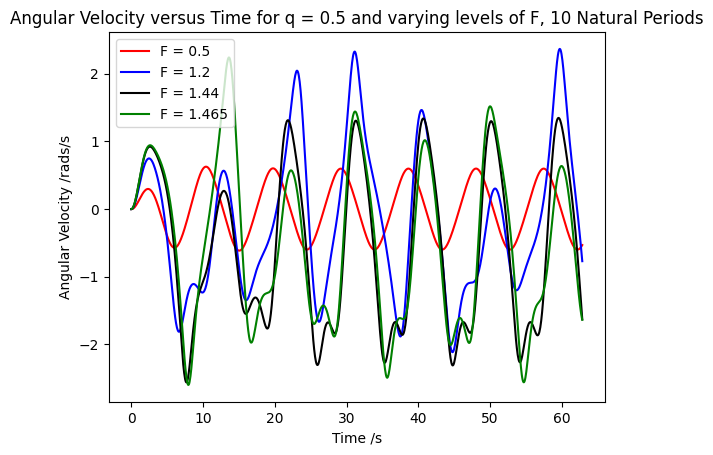

In [ ]:
solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.01,0),args=(0.5,0.5,),t_eval=np.linspace(0,10*2*np.pi,1000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(x,dydx,'r-',label = 'F = 0.5')
plt.xlabel("Time /s")
plt.ylabel("Angular Velocity /rads/s")
plt.title("Angular Velocity versus Time for q = 0.5 and varying levels of F, 10 Natural Periods")

solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.01,0),args=(0.5,1.2,),t_eval=np.linspace(0,10*2*np.pi,1000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(x,dydx,'b-',label = 'F = 1.2')

solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.01,0),args=(0.5,1.44,),t_eval=np.linspace(0,10*2*np.pi,1000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(x,dydx,'black',label = 'F = 1.44')

solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.01,0),args=(0.5,1.465,),t_eval=np.linspace(0,10*2*np.pi,1000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(x,dydx,'green',label = 'F = 1.465')

plt.legend()
plt.show()

**Conclusions**

From observing the lines plotted for various levels of the driving force (F values), in particular the angular velocity against time graph, we can see that the peaks are about the oscillation of the driving force.

**Supplementary Task 1**

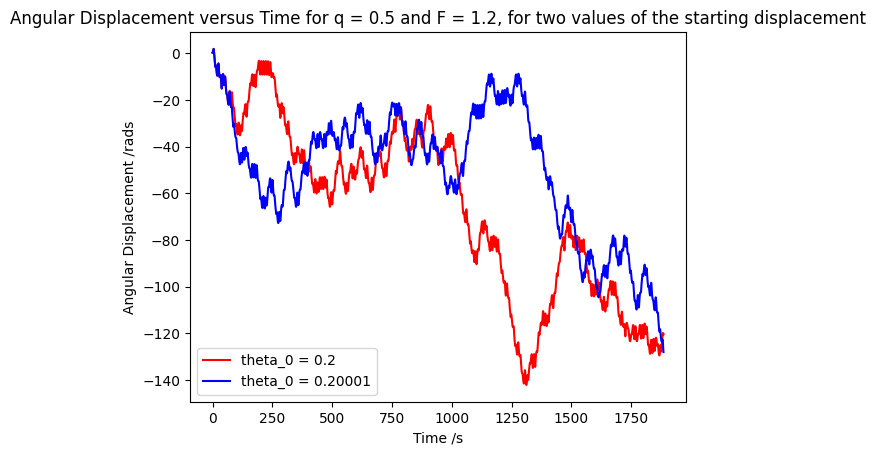

In [ ]:
solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.2,0),args=(0.5,1.2,),t_eval=np.linspace(0,300*2*np.pi,10000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(x,y,'r-',label = 'theta_0 = 0.2')
plt.xlabel("Time /s")
plt.ylabel("Angular Displacement /rads")
plt.title("Angular Displacement versus Time for q = 0.5 and F = 1.2, for two values of the starting displacement")

solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.20001,0),args=(0.5,1.2,),t_eval=np.linspace(0,300*2*np.pi,10000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(x,y,'b-',label = 'theta_0 = 0.20001')

plt.legend()
plt.show()

#For small times, the solutions appear to be identical. However, as you increase the time then it is obvious that the solutions diverge.

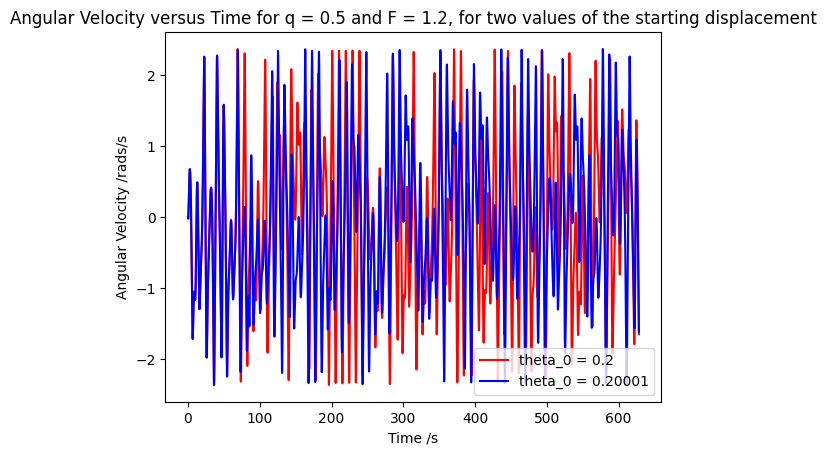

In [ ]:
solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.2,0),args=(0.5,1.2,),t_eval=np.linspace(0,100*2*np.pi,10000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(x,dydx,'r-',label = 'theta_0 = 0.2')
plt.xlabel("Time /s")
plt.ylabel("Angular Velocity /rads/s")
plt.title("Angular Velocity versus Time for q = 0.5 and F = 1.2, for two values of the starting displacement")

solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.20001,0),args=(0.5,1.2,),t_eval=np.linspace(0,100*2*np.pi,10000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(x,dydx,'b-',label = 'theta_0 = 0.20001')
plt.legend()
plt.show()

#For small times, the solutions appear to be identical. However, as you increase the time then it is obvious that the solutions diverge.

**Conclusions**

From observing the above two graphs, for small times, the solutions appear to be identical. However, as you increase the time then it is clear that the solutions diverge.

**Supplementary Task 2**

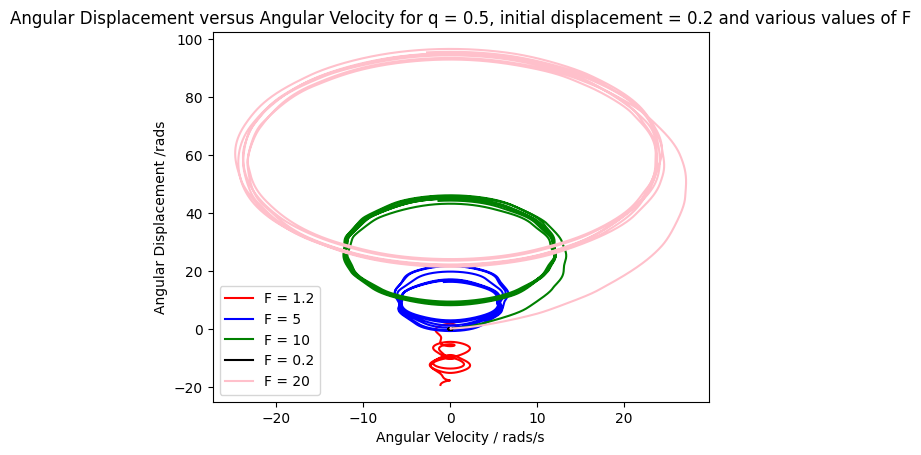

In [ ]:
solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.2,0),args=(0.5,1.2,),t_eval=np.linspace(0,10*2*np.pi,10000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(dydx,y,'r-',label = 'F = 1.2')
plt.xlabel("Angular Velocity / rads/s")
plt.ylabel("Angular Displacement /rads")
plt.title("Angular Displacement versus Angular Velocity for q = 0.5, initial displacement = 0.2 and various values of F")

solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.2,0),args=(0.5,5,),t_eval=np.linspace(0,10*2*np.pi,10000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(dydx,y,'b-',label = 'F = 5')

solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.2,0),args=(0.5,10,),t_eval=np.linspace(0,10*2*np.pi,10000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(dydx,y,'green',label = 'F = 10')

solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.2,0),args=(0.5,0.2,),t_eval=np.linspace(0,10*2*np.pi,10000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(dydx,y,'black',label = 'F = 0.2')

solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.2,0),args=(0.5,20,),t_eval=np.linspace(0,10*2*np.pi,10000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(dydx,y,'pink',label = 'F = 20')

plt.legend()
plt.show()

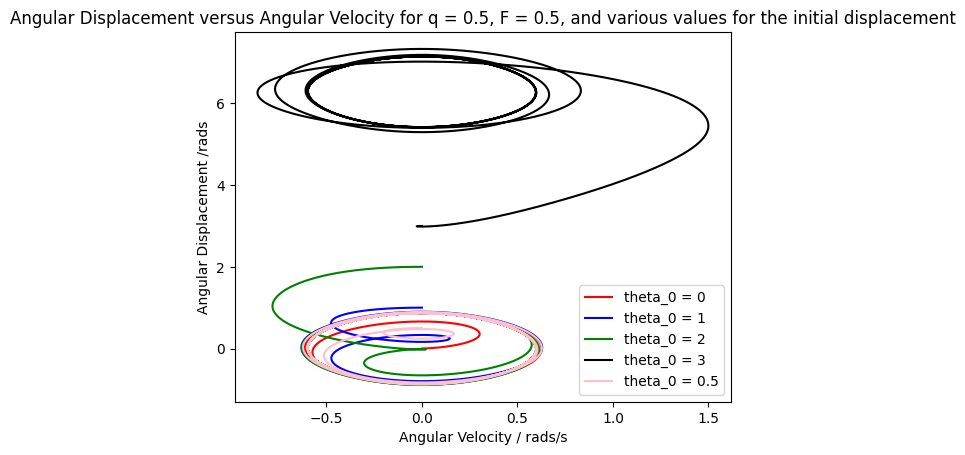

In [ ]:
solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0,0),args=(0.5,0.5,),t_eval=np.linspace(0,10*2*np.pi,10000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(dydx,y,'r-',label = 'theta_0 = 0')
plt.xlabel("Angular Velocity / rads/s")
plt.ylabel("Angular Displacement /rads")
plt.title("Angular Displacement versus Angular Velocity for q = 0.5, F = 0.5, and various values for the initial displacement")

solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(1,0),args=(0.5,0.5,),t_eval=np.linspace(0,10*2*np.pi,10000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(dydx,y,'b-',label = 'theta_0 = 1')

solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(2,0),args=(0.5,0.5,),t_eval=np.linspace(0,10*2*np.pi,10000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(dydx,y,'green',label = 'theta_0 = 2')

solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(3,0),args=(0.5,0.5,),t_eval=np.linspace(0,10*2*np.pi,10000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(dydx,y,'black',label = 'theta_0 = 3')

solution = scipy.integrate.solve_ivp(fun=derivatives,t_span=(0,300*2*np.pi),y0=(0.5,0),args=(0.5,0.5,),t_eval=np.linspace(0,10*2*np.pi,10000),)

x, y, dydx = solution.t, solution.y[0], solution.y[1]

plt.plot(dydx,y,'pink',label = 'theta_0 = 0.5')

plt.legend()
plt.show()

**Conclusions**

There is some interesting behaviour when varying the initial displacement and the value of the magnitude of the driving force.

For the driving force graph, we can see that increasing F increases the radius of the circle in the graph, and that the pendulum goes "over" once F has been increased past a critical value.

 For the graph where the initial displacement was varied, past a certain critical value we get chaotic behaviour where the max and min amplitudes seen at angular velocity = 0 is greater than the initial displacement.